# Pistachio Classification
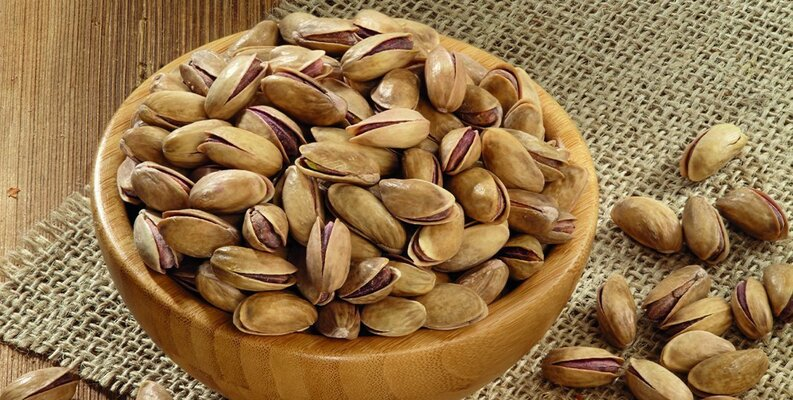

DATASET: https://www.muratkoklu.com/datasets/
CV:https://www.muratkoklu.com/en/publications/

Pistachio Image Dataset
Citation Request :

OZKAN IA., KOKLU M. and SARACOGLU R. (2021). Classification of Pistachio Species Using Improved K-NN Classifier. Progress in Nutrition, Vol. 23, N. 2, pp. DOI:10.23751/pn.v23i2.9686. (Open Access) https://www.mattioli1885journals.com/index.php/progressinnutrition/article/view/9686/9178

SINGH D, TASPINAR YS, KURSUN R, CINAR I, KOKLU M, OZKAN IA, LEE H-N., (2022). Classification and Analysis of Pistachio Species with Pre-Trained Deep Learning Models, Electronics, 11 (7), 981. https://doi.org/10.3390/electronics11070981. (Open Access)

Article Download (PDF):
1: https://www.mattioli1885journals.com/index.php/progressinnutrition/article/view/9686/9178
2: https://doi.org/10.3390/electronics11070981

DATASET: https://www.muratkoklu.com/datasets/



In [3]:
import numpy as np
import pandas as pd

import os

directory = 'Pistachio_Image_Dataset/'

In [4]:
!pip install split-folders

In [8]:
import matplotlib.pyplot as plt
import PIL

import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation




In [60]:
BATCH_SIZE = 32
IMG_SIZE = (300, 300)

train_dataset = image_dataset_from_directory(directory,
                                             shuffle = True,
                                             image_size = IMG_SIZE,
                                             validation_split = 0.2,
                                             subset = 'training',
                                             seed = 42
                                            )

validation_dataset = image_dataset_from_directory(directory,
                                             shuffle = True,
                                             image_size = IMG_SIZE,
                                             validation_split = 0.2,
                                             subset = 'validation',
                                             seed = 42
                                            )



Found 2148 files belonging to 2 classes.
Using 1719 files for training.
Found 2148 files belonging to 2 classes.
Using 429 files for validation.


In [34]:
test_dataset = dataset_.take(7)
validation_dataset = dataset_.skip(7)

In [61]:
class_names = train_dataset.class_names
print(class_names)

['Kirmizi', 'Siirt']


(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)


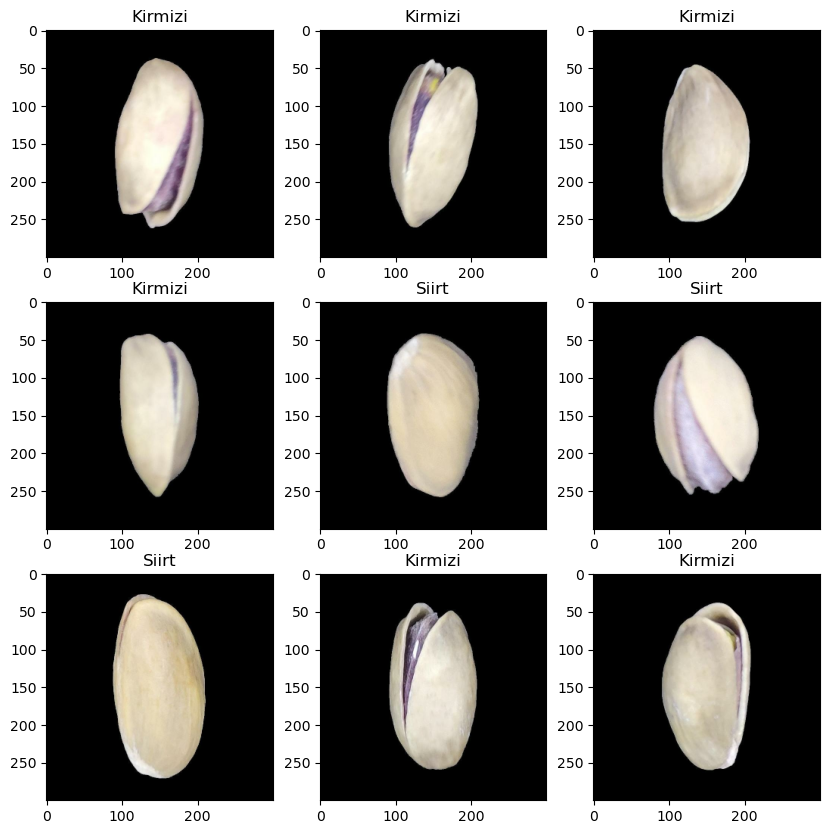

In [63]:
plt.figure(figsize = (10,10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        print(images[i].shape)
        plt.imshow(images[i]/255)
        plt.title(class_names[labels[i]])
        

In [64]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size = AUTOTUNE)

In [65]:
def data_augmenter():
    data_augmentation = tf.keras.Sequential([
        RandomFlip('horizontal'),
        RandomFlip('vertical'),
        RandomRotation(0.2),
        RandomRotation(0.1)
    ])
    return data_augmentation

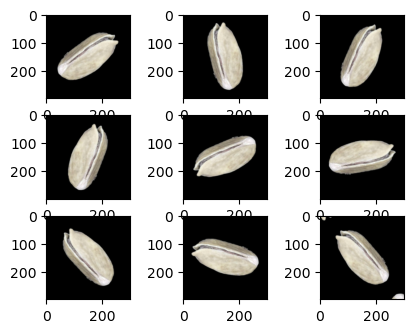

In [66]:
data_augmentation = data_augmenter()

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(5,5))
    image = image[0]
    for i in range(9):
        ax = plt.subplot(4, 3, i+1)
        augmented_image = data_augmentation(image/255)
        plt.imshow(augmented_image)
        

In [67]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

In [81]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.efficientnet.EfficientNetB3(input_shape = IMG_SHAPE,
                                                               include_top = True,
                                                               weights = 'imagenet'
                                                              )

In [82]:
base_model.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 rescaling_10 (Rescaling)    (None, 300, 300, 3)          0         ['input_9[0][0]']             
                                                                                                  
 normalization_5 (Normaliza  (None, 300, 300, 3)          7         ['rescaling_10[0][0]']        
 tion)                                                                                            
                                                                                                  
 rescaling_11 (Rescaling)    (None, 300, 300, 3)          0         ['normalization_5

                                                                                                  
 block2a_expand_conv (Conv2  (None, 150, 150, 144)        3456      ['block1b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2a_expand_bn (BatchNo  (None, 150, 150, 144)        576       ['block2a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2a_expand_activation   (None, 150, 150, 144)        0         ['block2a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2a_d

 block2c_expand_conv (Conv2  (None, 75, 75, 192)          6144      ['block2b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2c_expand_bn (BatchNo  (None, 75, 75, 192)          768       ['block2c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2c_expand_activation   (None, 75, 75, 192)          0         ['block2c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2c_dwconv (DepthwiseC  (None, 75, 75, 192)          1728      ['block2c_expand_activation[0]
 onv2D)   

 D)                                                                                               
                                                                                                  
 block3b_expand_bn (BatchNo  (None, 38, 38, 288)          1152      ['block3b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block3b_expand_activation   (None, 38, 38, 288)          0         ['block3b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block3b_dwconv (DepthwiseC  (None, 38, 38, 288)          7200      ['block3b_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block4a_expand_conv (Conv2  (None, 38, 38, 288)          13824     ['block3c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4a_expand_bn (BatchNo  (None, 38, 38, 288)          1152      ['block4a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4a_expand_activation   (None, 38, 38, 288)          0         ['block4a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4a_dwconv_pad (ZeroPa  (None, 39, 39, 288)          0         ['block4a_expand_activation[0]
 dding2D) 

 D)                                                                                               
                                                                                                  
 block4c_expand_bn (BatchNo  (None, 19, 19, 576)          2304      ['block4c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4c_expand_activation   (None, 19, 19, 576)          0         ['block4c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4c_dwconv (DepthwiseC  (None, 19, 19, 576)          5184      ['block4c_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block4e_expand_conv (Conv2  (None, 19, 19, 576)          55296     ['block4d_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4e_expand_bn (BatchNo  (None, 19, 19, 576)          2304      ['block4e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4e_expand_activation   (None, 19, 19, 576)          0         ['block4e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4e_dwconv (DepthwiseC  (None, 19, 19, 576)          5184      ['block4e_expand_activation[0]
 onv2D)   

 rmalization)                                                                                     
                                                                                                  
 block5b_expand_activation   (None, 19, 19, 816)          0         ['block5b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5b_dwconv (DepthwiseC  (None, 19, 19, 816)          20400     ['block5b_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5b_bn (BatchNormaliza  (None, 19, 19, 816)          3264      ['block5b_dwconv[0][0]']      
 tion)                                                                                            
          

 block5d_expand_bn (BatchNo  (None, 19, 19, 816)          3264      ['block5d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5d_expand_activation   (None, 19, 19, 816)          0         ['block5d_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5d_dwconv (DepthwiseC  (None, 19, 19, 816)          20400     ['block5d_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5d_bn (BatchNormaliza  (None, 19, 19, 816)          3264      ['block5d_dwconv[0][0]']      
 tion)    

                                                                                                  
 block6a_expand_bn (BatchNo  (None, 19, 19, 816)          3264      ['block6a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6a_expand_activation   (None, 19, 19, 816)          0         ['block6a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6a_dwconv_pad (ZeroPa  (None, 23, 23, 816)          0         ['block6a_expand_activation[0]
 dding2D)                                                           [0]']                         
                                                                                                  
 block6a_d

 block6c_expand_bn (BatchNo  (None, 10, 10, 1392)         5568      ['block6c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6c_expand_activation   (None, 10, 10, 1392)         0         ['block6c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6c_dwconv (DepthwiseC  (None, 10, 10, 1392)         34800     ['block6c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6c_bn (BatchNormaliza  (None, 10, 10, 1392)         5568      ['block6c_dwconv[0][0]']      
 tion)    

                                                                                                  
 block6e_expand_bn (BatchNo  (None, 10, 10, 1392)         5568      ['block6e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6e_expand_activation   (None, 10, 10, 1392)         0         ['block6e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6e_dwconv (DepthwiseC  (None, 10, 10, 1392)         34800     ['block6e_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6e_b

 D)                                                                                               
                                                                                                  
 block7a_expand_bn (BatchNo  (None, 10, 10, 1392)         5568      ['block7a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block7a_expand_activation   (None, 10, 10, 1392)         0         ['block7a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block7a_dwconv (DepthwiseC  (None, 10, 10, 1392)         12528     ['block7a_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 top_activation (Activation  (None, 10, 10, 1536)         0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
 avg_pool (GlobalAveragePoo  (None, 1536)                 0         ['top_activation[0][0]']      
 ling2D)                                                                                          
                                                                                                  
 top_dropout (Dropout)       (None, 1536)                 0         ['avg_pool[0][0]']            
                                                                                                  
 predictions (Dense)         (None, 1000)                 1537000   ['top_dropout[0][0]']         
                                                                                                  
Total para

In [70]:
layer_len = len(base_model.layers)

print(base_model.layers[layer_len-1].name)

predictions


In [114]:
def pistachio_model(IMG_SHAPE, data_augmentation = data_augmenter()):
    input_shape = IMG_SHAPE
    base_model = tf.keras.applications.efficientnet.EfficientNetB3(input_shape = IMG_SHAPE,
                                                                   include_top = False,
                                                                   weights = 'imagenet',
                                                                  )
    base_model.trainable = False
    inputs = tf.keras.Input(shape = input_shape)
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = base_model(x, training = False)
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Dropout(0.5)(x)
    
    outputs = tfl.Dense(1, activation = 'linear')(x)
    
    model = tf.keras.Model(inputs,outputs)
    
    return model

In [115]:
model = pistachio_model(IMG_SHAPE, data_augmentation)

In [116]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 300, 300, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (300, 300, 3)             0         
                                                                 
 efficientnetb3 (Functional  (None, 10, 10, 1536)      10783535  
 )                                                               
                                                                 
 global_average_pooling2d_4  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_4 (Dropout)         (None, 1536)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1537

In [117]:
lr = 0.01
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy']
             )

In [118]:
initial_epochs = 10
history = model.fit(train_dataset, validation_data = validation_dataset, epochs = initial_epochs)

Epoch 1/10
54/54 [==============================] - 289s 5s/step - loss: 0.2915 - accuracy: 0.8650 - val_loss: 0.4292 - val_accuracy: 0.8462
Epoch 2/10
54/54 [==============================] - 278s 5s/step - loss: 0.1698 - accuracy: 0.9308 - val_loss: 0.3469 - val_accuracy: 0.8788
Epoch 3/10
54/54 [==============================] - 281s 5s/step - loss: 0.1487 - accuracy: 0.9343 - val_loss: 0.2484 - val_accuracy: 0.9184
Epoch 4/10
54/54 [==============================] - 276s 5s/step - loss: 0.1565 - accuracy: 0.9348 - val_loss: 0.4020 - val_accuracy: 0.8601
Epoch 5/10
54/54 [==============================] - 249s 5s/step - loss: 0.1362 - accuracy: 0.9430 - val_loss: 0.3760 - val_accuracy: 0.8671
Epoch 6/10
54/54 [==============================] - 251s 5s/step - loss: 0.1428 - accuracy: 0.9447 - val_loss: 0.3204 - val_accuracy: 0.8951
Epoch 7/10
54/54 [==============================] - 248s 5s/step - loss: 0.1295 - accuracy: 0.9500 - val_loss: 0.3899 - val_accuracy: 0.8741
Epoch 8/10
54

In [120]:
base_model = model.layers[2]
base_model.trainable = True
for layer in base_model.layers[:300]:
    layer.trainable = False

lr = 0.0001
loss_function = tf.keras.losses.BinaryCrossentropy(from_logits = True)
optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
metrics = ['accuracy']


model.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)

In [121]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/15
54/54 [==============================] - 381s 6s/step - loss: 0.1760 - accuracy: 0.9325 - val_loss: 0.2848 - val_accuracy: 0.9091
Epoch 11/15
54/54 [==============================] - 344s 6s/step - loss: 0.0504 - accuracy: 0.9802 - val_loss: 0.3977 - val_accuracy: 0.8904
Epoch 12/15
54/54 [==============================] - 332s 6s/step - loss: 0.0504 - accuracy: 0.9843 - val_loss: 0.0910 - val_accuracy: 0.9744
Epoch 13/15
54/54 [==============================] - 336s 6s/step - loss: 0.0406 - accuracy: 0.9866 - val_loss: 0.1220 - val_accuracy: 0.9604
Epoch 14/15
54/54 [==============================] - 348s 6s/step - loss: 0.0243 - accuracy: 0.9913 - val_loss: 0.1625 - val_accuracy: 0.9534
Epoch 15/15
54/54 [==============================] - 351s 7s/step - loss: 0.0311 - accuracy: 0.9889 - val_loss: 0.3234 - val_accuracy: 0.9231
